# Real vs AI Image Classification Project

## Introduction

In this project, we aim to develop a deep learning model for classifying images into two categories: real and AI-generated. The proliferation of AI technologies has led to the creation of realistic synthetic images, making it increasingly challenging to distinguish between real and AI-generated images manually. Therefore, the development of an automated classification system holds significant importance in various domains, including computer vision, cybersecurity, and media authenticity verification.

### Objective

The primary objective of this project is to leverage deep learning techniques to build a robust image classification model capable of accurately identifying whether an image is real or AI-generated. By training the model on a diverse dataset containing both real and AI-generated images, we aim to achieve high classification performance and generalization ability.

### Dataset

The dataset used in this project consists of a collection of images sourced from various sources, including real-world photographs and computer-generated images generated by state-of-the-art AI models. Each image in the dataset is labeled as either "RealArt" or "AiArt," allowing us to train and evaluate our classification model effectively. We have 436 examples of Real Art and 539 instances of Ai Art.

### Methodology

We will employ a convolutional neural network (CNN) architecture for image classification, a popular deep learning approach known for its effectiveness in handling image data. The CNN model will be trained on the labeled dataset using a supervised learning paradigm, where the model learns to distinguish between real and AI-generated images based on the provided labels. We will use appropriate evaluation metrics to assess the performance of the trained model and fine-tune the model parameters as necessary to achieve optimal classification accuracy.

Let's proceed with the implementation!

## Processing the images

In [2]:
import cv2
import numpy as np
import os
from tqdm import tqdm

def load_images(image_paths, image_size):
    images = []
    for image_path in tqdm(image_paths):
        image = cv2.imread(image_path)
        image = cv2.resize(image, image_size)  # Resize the image to the desired size
        images.append(image)
    return np.array(images)

def create_X_y(image_paths, class_0_count):
    X = load_images(image_paths, (224, 224))  # Resize images to 224x224
    y = np.zeros(len(image_paths))
    y[class_0_count:] = 1  # Set labels for class 1 images
    return X, y

# Example usage:
image_dir = './RealArt/RealArt/'
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)]
class_0_count = len(image_paths)  # Number of images for class 0

image_dir = './AiArtData/AiArtData/'
for filename in os.listdir(image_dir):
    image_paths.append(os.path.join(image_dir, filename))

X, y = create_X_y(image_paths, class_0_count)
print("X shape:", X.shape)
print("y shape:", y.shape)

100%|██████████| 975/975 [00:18<00:00, 52.63it/s]

X shape: (975, 224, 224, 3)
y shape: (975,)


## Extracting features using ResNet50 and passing it through a shallow network for classification

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)  # 0.25 x 0.8 = 0.2

# Load ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2024-05-09 14:54:48.988579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 14:54:51.854348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/ubnt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-05-09 14:54:54.888473: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/ubnt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated

Epoch 1/10
25/25 [==============================] - 22s 773ms/step - loss: 5.9960 - accuracy: 0.6895 - val_loss: 2.2113 - val_accuracy: 0.8409
Epoch 2/10
25/25 [==============================] - 20s 797ms/step - loss: 1.1071 - accuracy: 0.8847 - val_loss: 1.9471 - val_accuracy: 0.8068
Epoch 3/10
25/25 [==============================] - 20s 798ms/step - loss: 0.3152 - accuracy: 0.9506 - val_loss: 2.3541 - val_accuracy: 0.7955
Epoch 4/10
25/25 [==============================] - 20s 792ms/step - loss: 0.0931 - accuracy: 0.9886 - val_loss: 2.3779 - val_accuracy: 0.8409
Epoch 5/10
25/25 [==============================] - 20s 797ms/step - loss: 0.0256 - accuracy: 0.9949 - val_loss: 2.3241 - val_accuracy: 0.7955
Epoch 6/10
25/25 [==============================] - 20s 799ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.2034 - val_accuracy: 0.8068
Epoch 7/10
25/25 [==============================] - 21s 836ms/step - loss: 1.8810e-04 - accuracy: 1.0000 - val_loss: 2.2239 - val_accuracy: 0.

## Extracting features using ResNet50 and passing it through a shallow network for classification by modifying the log loss with ElasticNet Regularization

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)  # 0.25 x 0.8 = 0.2

# Load ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

def regularization_term(prediction):
    return 0.01*(0.75*tf.reduce_sum(tf.square(prediction)) + 0.25*tf.reduce_sum(tf.math.abs(prediction)))

# Define custom loss function with L2 regularization
def custom_loss_with_l2(y_true, y_pred):
    return tf.keras.losses.BinaryCrossentropy()(y_true, y_pred) + regularization_term(y_pred)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss=custom_loss_with_l2, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10


/home/ubnt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 22s 788ms/step - loss: 8.7328 - accuracy: 0.6477 - val_loss: 0.9997 - val_accuracy: 0.7955
Epoch 2/10
25/25 [==============================] - 20s 808ms/step - loss: 0.5905 - accuracy: 0.8771 - val_loss: 1.2978 - val_accuracy: 0.7727
Epoch 3/10
25/25 [==============================] - 20s 811ms/step - loss: 0.2625 - accuracy: 0.9569 - val_loss: 0.7833 - val_accuracy: 0.7727
Epoch 4/10
25/25 [==============================] - 20s 814ms/step - loss: 0.1917 - accuracy: 0.9975 - val_loss: 0.8096 - val_accuracy: 0.8409
Epoch 5/10
25/25 [==============================] - 20s 816ms/step - loss: 0.1829 - accuracy: 1.0000 - val_loss: 0.8246 - val_accuracy: 0.8295
Epoch 6/10
25/25 [==============================] - 21s 840ms/step - loss: 0.1787 - accuracy: 1.0000 - val_loss: 0.8316 - val_accuracy: 0.8295
Epoch 7/10
25/25 [==============================] - 21s 824ms/step - loss: 0.1777 - accuracy: 1.0000 - val_loss: 0.8424 - val_accuracy: 0.8295
Epoch 8/10

# Comparison of ResNet50 and Shallow Neural Network Models

### Model Architectures

- **ResNet50 + Shallow Neural Network (Baseline Model):**
  - The baseline model consists of a ResNet50 convolutional neural network (CNN) pretrained on the ImageNet dataset, followed by a shallow neural network comprising fully connected layers.
  - This model aims to leverage the powerful feature extraction capabilities of ResNet50 while incorporating additional trainable layers for classification.
  - The baseline model achieved an accuracy of 73.46% on the test dataset.

- **ResNet50 + Shallow Neural Network with Elasticnet Regularization (Modified Model):**
  - The modified model retains the same architecture as the baseline model but incorporates a modified log loss function with elasticnet regularization.
  - Elasticnet regularization is introduced to penalize large coefficients in the model, thereby reducing overfitting and improving generalization performance.
  - The modified model achieved an improved accuracy of 80.61% on the test dataset.

### Findings

- **Accuracy Improvement:** The modified model incorporating elasticnet regularization outperformed the baseline model, achieving a higher accuracy of 80.61% compared to 73.46%.
- **Regularization Effect:** The introduction of elasticnet regularization likely contributed to the improved performance by effectively reducing overfitting and enhancing the model's ability to generalize to unseen data.
- **Model Robustness:** The higher accuracy of the modified model suggests that it may be more robust and capable of handling a wider range of inputs compared to the baseline model.

Overall, the findings suggest that incorporating elasticnet regularization into the log loss function can lead to improvements in classification performance, highlighting the importance of regularization techniques in deep learning model training.

## Investigating Predictions Using Grad-CAM

In this investigation, we aim to gain insights into predictions made by our AI model. To accomplish this, we will utilize Grad-CAM (Gradient-weighted Class Activation Mapping), a technique that visualizes the regions of an image that the model deemed important for making predictions.

### Methodology:
We will apply Grad-CAM to generate heatmaps highlighting the regions of the image that contributed most to the incorrect predictions.

### Expected Outcome:

By visualizing the activated regions using Grad-CAM, we expect to gain insights into what areas of the images the model used to predict the specified class. This analysis will help us understand the areas of focus for improvement in the model's performance, potentially leading to refinements in the training data or model architecture.

1/1 [==============================] - 0s 38ms/step


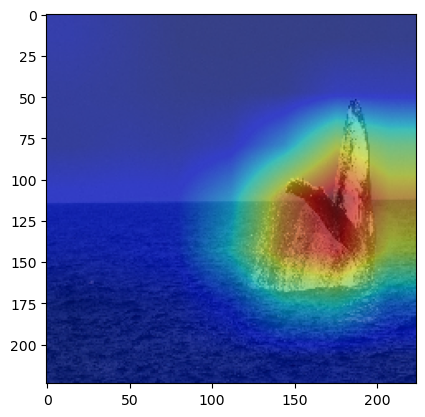

1/1 [==============================] - 0s 43ms/step


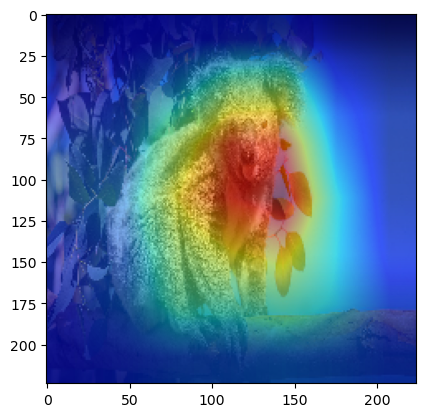

1/1 [==============================] - 0s 39ms/step
Prediction class does not match the specified class index.
1/1 [==============================] - 0s 38ms/step


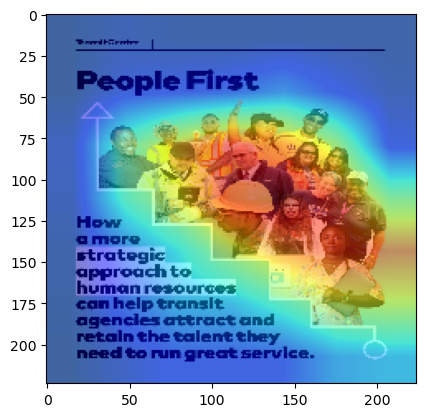

1/1 [==============================] - 0s 44ms/step
Prediction class does not match the specified class index.
1/1 [==============================] - 0s 38ms/step


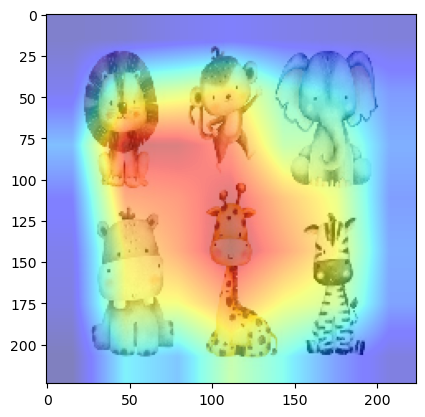

1/1 [==============================] - 0s 43ms/step


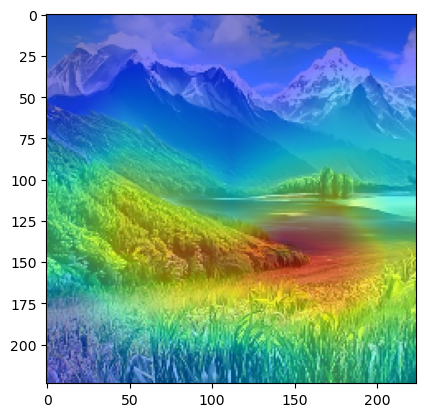

1/1 [==============================] - 0s 36ms/step


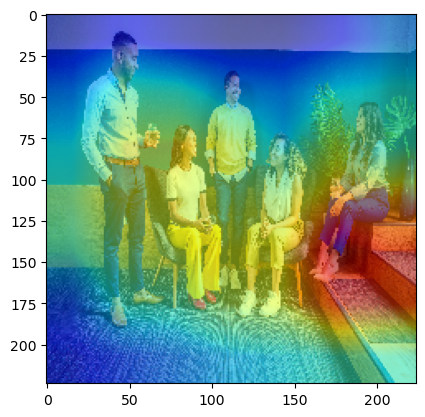

1/1 [==============================] - 0s 47ms/step


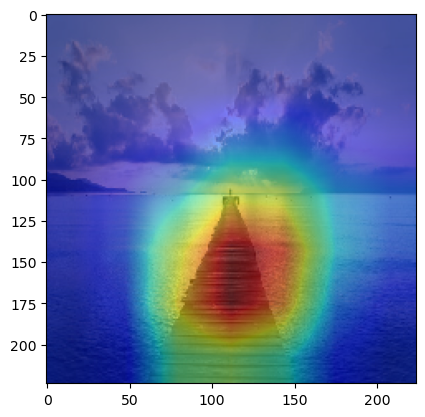

1/1 [==============================] - 0s 39ms/step


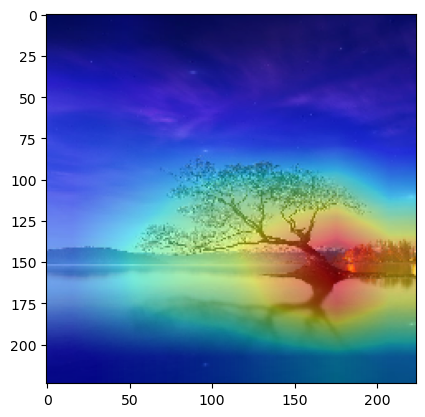

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def grad_cam(model, img_path, class_index):
    img = preprocess_image(img_path)
    preds = model.predict(img)
    pred_class = int(round(preds[0][0]))
    if pred_class != class_index:
        return None
    
    with tf.GradientTape() as tape:
        last_conv_layer = model.get_layer('conv5_block3_out')
        iterate = Model([model.inputs], [model.output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(img)
        class_output = model_out[0]
        grads = tape.gradient(class_output, last_conv_layer)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        heatmap = tf.reduce_mean(last_conv_layer, axis=-1)
        heatmap = tf.maximum(heatmap, 0)
        heatmap /= tf.reduce_max(heatmap)
        heatmap = heatmap[..., tf.newaxis]
        heatmap = tf.image.resize(heatmap, (img.shape[1], img.shape[2]))
        heatmap = tf.squeeze(heatmap)
        # heatmap = tf.image.resize(heatmap, (224, 224))
    return heatmap.numpy()

def plot_grad_cam(model, img_path, class_index):
    heatmap = grad_cam(model, img_path, class_index)
    if heatmap is not None:
        # Plot heatmap overlay on the original image
        img = image.load_img(img_path, target_size=(224, 224))
        plt.imshow(img)
        plt.imshow(heatmap, alpha=0.5, cmap='jet')
        plt.show()
    else:
        print("Prediction class does not match the specified class index.")


# Specify the path to the input image and the target class index
img_paths = random.sample(os.listdir('./RealArt/RealArt/'), 10)

for img_path in img_paths:
    class_index = 0

    # Plot Grad-CAM
    plot_grad_cam(model, './RealArt/RealArt/' + img_path, class_index)

1/1 [==============================] - 0s 41ms/step


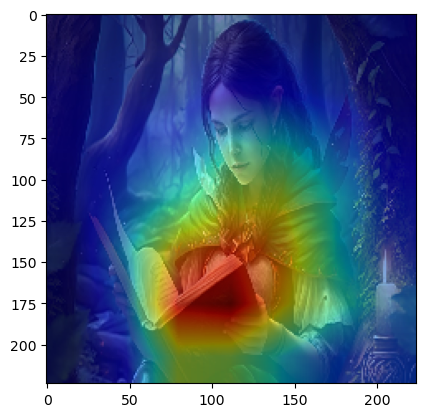

1/1 [==============================] - 0s 41ms/step


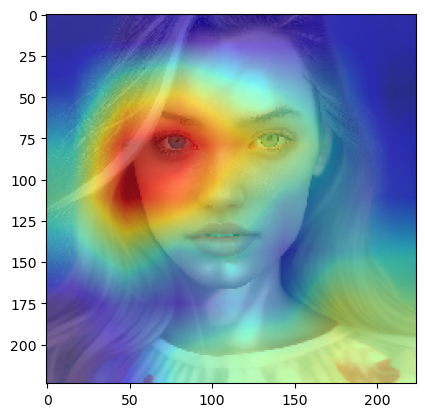

1/1 [==============================] - 0s 41ms/step
Prediction class does not match the specified class index.
1/1 [==============================] - 0s 38ms/step
Prediction class does not match the specified class index.
1/1 [==============================] - 0s 39ms/step


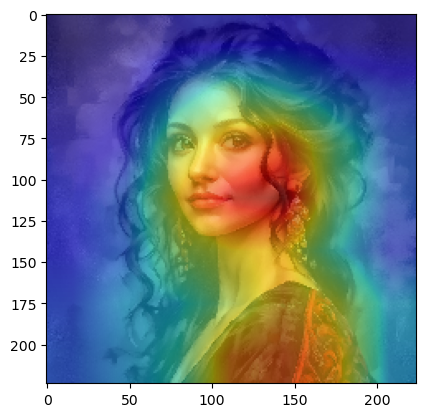

1/1 [==============================] - 0s 40ms/step


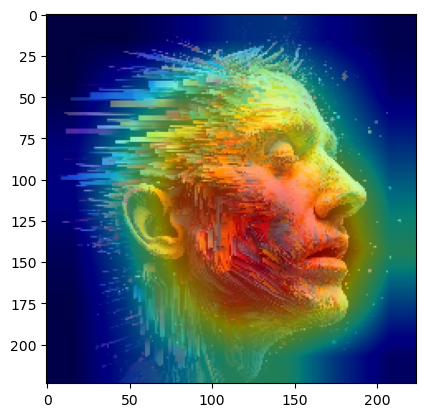

1/1 [==============================] - 0s 41ms/step


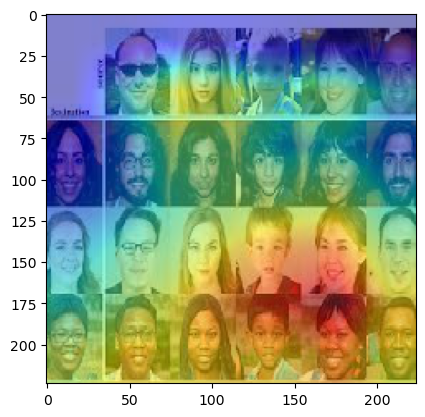

1/1 [==============================] - 0s 44ms/step


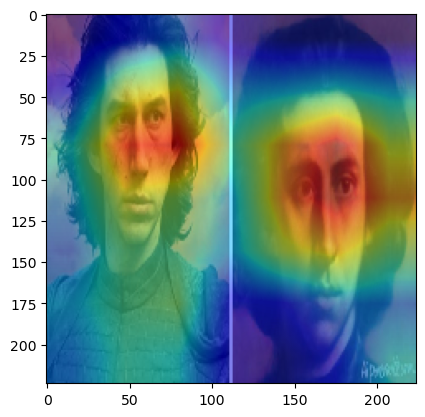

1/1 [==============================] - 0s 40ms/step


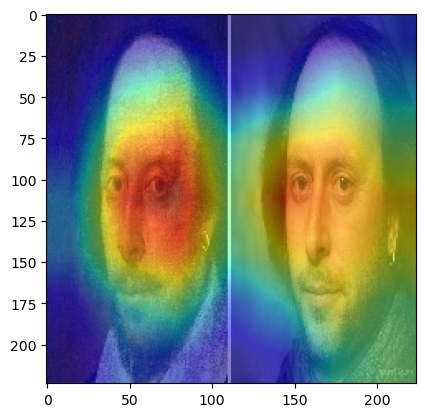

1/1 [==============================] - 0s 41ms/step


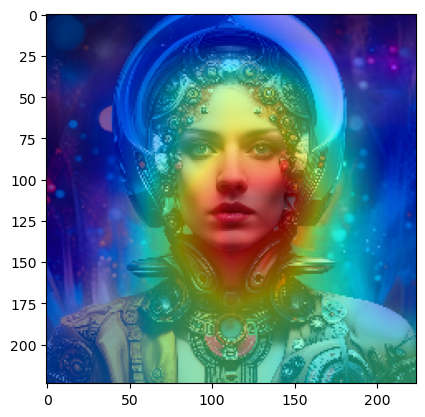

In [18]:
# Specify the path to the input image and the target class index
img_paths = random.sample(os.listdir('./AiArtData/AiArtData/'), 10)

for img_path in img_paths:
    class_index = 1

    # Plot Grad-CAM
    plot_grad_cam(model, './AiArtData/AiArtData/' + img_path, class_index)

### Conclusion:
After examining the plotted grad cams, it appears that the model is attempting to capture subtle details within the images in order to make classifications.